# PCA - 2

# 1) PCA on Olevitti Images

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
oliv = datasets.fetch_olivetti_faces()

In [3]:
oliv

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
oliv.keys() ## this is a dictionary 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [5]:
oliv["data"].shape
## we have 400 images as 400 datapoint 
## there 4096 pixels / features of each images

(400, 4096)

In [6]:
oliv["images"].shape
## we have 400 images and each of dimension 64 x 64 = 4096

(400, 64, 64)

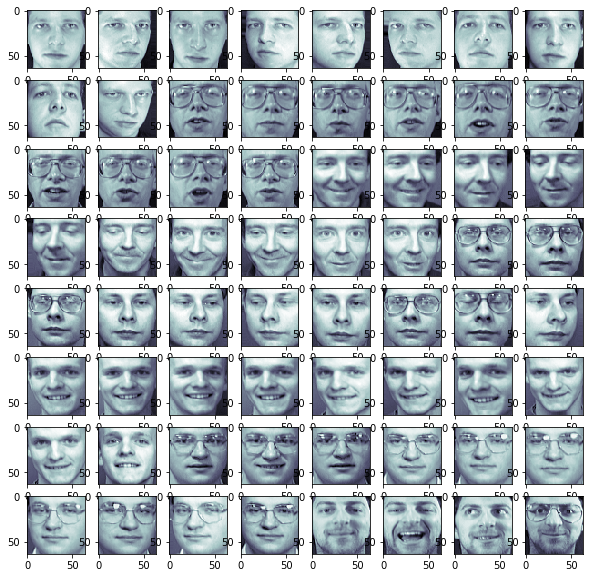

In [7]:
fig = plt.figure(figsize = (10 , 10))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1)
    ax.imshow(oliv.images[i] , cmap = plt.cm.bone)
plt.show()
## cmap :: color map
## this dataset is about 40 person each have 10 images
## 0 and 50 are s ticks and y ticks

In [8]:
x = oliv.data
y = oliv.target

In [9]:
pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(oliv["data"].shape)
## after applying PCA pca components size should be 4096 x 4096
## but it will not the case, if we look into the documentations
## bydefault it is equal to min(400 , 4096) , 4096
pca.components_.shape

(400, 4096)


(400, 4096)

In [11]:
pca.components_[0].shape, pca.components_[1].shape

((4096,), (4096,))

In [12]:
k = 0
total = sum(pca.explained_variance_)
curr_sum = 0
while curr_sum / total < 0.95:
    curr_sum += pca.explained_variance_[k]
    k += 1
k

123

In [13]:
# pca = PCA(n_components = k)
pca = PCA(n_components = k , whiten = True)
## whiten = True
## affeccts features after applying PCA so that they produce better results
## it kind of similar to feature scaling, feature scaling applied once you have done PCA
## now these new 123 features reduce to some what around 0 mean and same variation
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

# 2) Reproducing Images

In [14]:
## let's get back our original data 
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

In [15]:
x_approx_images = x_approx.reshape((400 , 64 , 64))

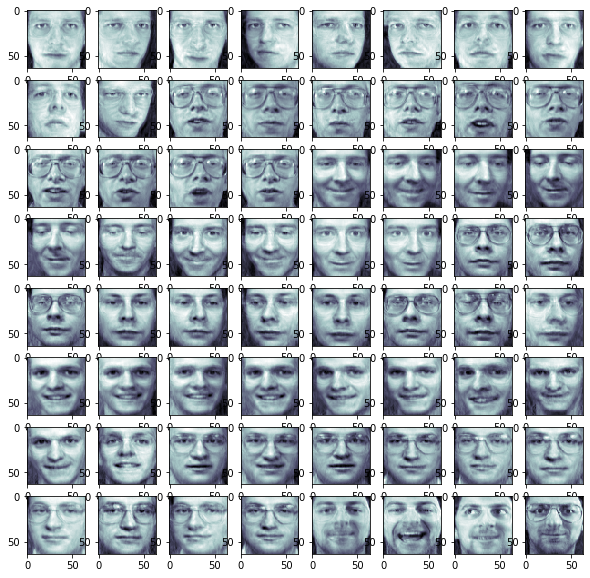

In [16]:
fig = plt.figure(figsize = (10, 10))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1)
    ax.imshow(x_approx_images[i] , cmap = plt.cm.bone)
plt.show()

# 3) Eigenfaces

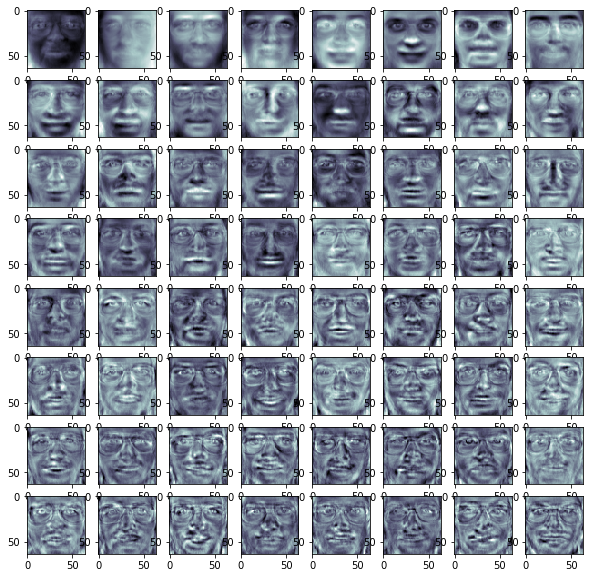

In [17]:
eigenv = pca.components_
eigenfaces = eigenv.reshape((123 , 64 , 64))
fig = plt.figure(figsize = (10, 10))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1)
    ax.imshow(eigenfaces[i], cmap = plt.cm.bone)
plt.show()

# 4) Classfication of LFW Images

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble
import time

In [19]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100 , resize = 0.4)

In [20]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [21]:
lfw.data.shape

(109, 1850)

In [22]:
lfw.images.shape

(109, 50, 37)

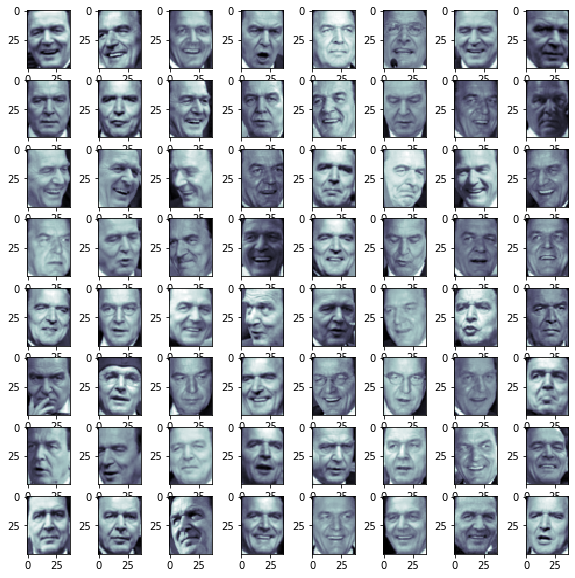

In [23]:
fig = plt.figure(figsize = (10, 10))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1)
    ax.imshow(lfw.images[i] , cmap = plt.cm.bone)
plt.show()

In [24]:
x , y = lfw.data , lfw.target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

pca_oliv = PCA()
pca_oliv.fit(x_train)

k = 0
total = 0 
while total < 0.99:
    total += pca_oliv.explained_variance_ratio_[k]
    k += 1
k

65

In [25]:
pca_lfw = PCA(n_components = k , whiten = True)
x_transformed = pca_lfw.fit_transform(x_train)
x_transformed.shape

(81, 65)

In [26]:
x_approx = pca_lfw.inverse_transform(x_transformed)
x_approx = x_approx.reshape(81 , 50 , 37)

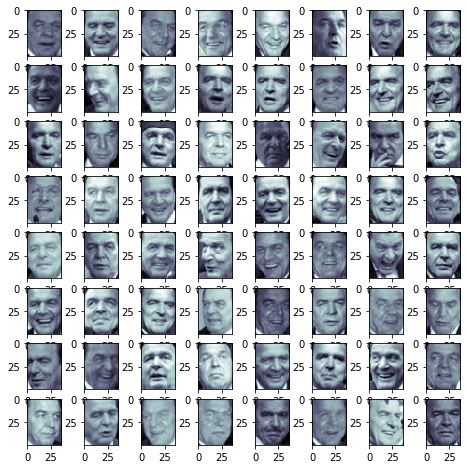

In [27]:
fig = plt.figure(figsize = (8 , 8))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1)
    ax.imshow(x_approx[i] , cmap = plt.cm.bone)
plt.show()

In [28]:
pca_lfw.components_.shape

(65, 1850)

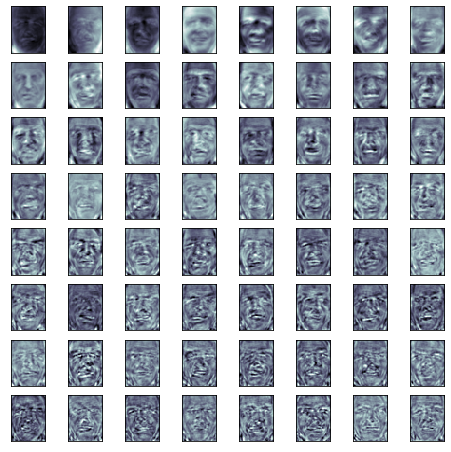

In [29]:
eigenv = pca_lfw.components_.reshape(k , 50 , 37)
fig = plt.figure(figsize = (8 , 8))
for i in range(64):
    ax = fig.add_subplot(8 , 8 , i + 1 , xticks = [] , yticks = [])
    ax.imshow(eigenv[i] , cmap = plt.cm.bone)
plt.show()

In [30]:
x_train_pca = x_transformed
x_test_pca = pca_lfw.transform(x_test)

In [31]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train , y_train)
print(time.time() - start)
y_pred=rf.predict(x_test)
print(classification_report(y_test , y_pred))

0.2823657989501953
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



In [32]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca , y_train)
print(time.time() - start)
y_pred = rf.predict(x_test_pca)
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))

0.29250550270080566
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

[[28]]
